In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [77]:
df = pd.read_csv('car_prices.csv')

In [78]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [81]:
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()

In [5]:
df['make'].value_counts()

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64

In [6]:
df['model'].value_counts()

model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64

In [10]:
df['body'].value_counts()

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [7]:
df['year'].value_counts()

year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64

In [8]:
df['transmission'].value_counts()

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

In [9]:
df['color'].value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64

In [11]:
df['interior'].value_counts()

interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [13]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [15]:
df['make'].isna().all()

False

In [20]:
df['make'].isna() == 'True'

0         False
1         False
2         False
3         False
4         False
          ...  
558832    False
558833    False
558834    False
558835    False
558836    False
Name: make, Length: 558837, dtype: bool

In [24]:
na_rows = df['make'].dropna()

In [25]:
na_rows

0            Kia
1            Kia
2            BMW
3          Volvo
4            BMW
           ...  
558832       Kia
558833       Ram
558834       BMW
558835    Nissan
558836      Ford
Name: make, Length: 548536, dtype: object

In [82]:
df = df.dropna(subset=['sellingprice'])
df = df.dropna(subset=['make'])
df = df.dropna(subset=['model'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548438 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548438 non-null  int64  
 1   make          548438 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548088 non-null  object 
 4   body          545544 non-null  object 
 5   transmission  484853 non-null  object 
 6   vin           548434 non-null  object 
 7   state         548438 non-null  object 
 8   condition     536705 non-null  float64
 9   odometer      548348 non-null  float64
 10  color         547709 non-null  object 
 11  interior      547709 non-null  object 
 12  seller        548438 non-null  object 
 13  mmr           548400 non-null  float64
 14  sellingprice  548426 non-null  float64
 15  saledate      548426 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


In [83]:
unique_values_set = set(df['make'])
unique_model_set = set(df['model'])
unique_values_set

{'acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo',
 'vw'}

In [84]:
make_mapping = {car: index + 1 for index, car in enumerate(unique_values_set)}   # create a numeric representation for each make

model_mapping = {car: index + 1 for index, car in enumerate(unique_model_set)}

make_mapping

{'saab': 1,
 'daewoo': 2,
 'mitsubishi': 3,
 'buick': 4,
 'smart': 5,
 'ford': 6,
 'fiat': 7,
 'mazda': 8,
 'dodge tk': 9,
 'hyundai tk': 10,
 'lamborghini': 11,
 'acura': 12,
 'jaguar': 13,
 'porsche': 14,
 'tesla': 15,
 'lexus': 16,
 'mazda tk': 17,
 'vw': 18,
 'mercedes-benz': 19,
 'scion': 20,
 'dot': 21,
 'aston martin': 22,
 'audi': 23,
 'honda': 24,
 'mercedes-b': 25,
 'kia': 26,
 'ram': 27,
 'gmc': 28,
 'hummer': 29,
 'rolls-royce': 30,
 'jeep': 31,
 'bentley': 32,
 'fisker': 33,
 'ferrari': 34,
 'nissan': 35,
 'chevrolet': 36,
 'pontiac': 37,
 'saturn': 38,
 'volvo': 39,
 'chrysler': 40,
 'maserati': 41,
 'suzuki': 42,
 'cadillac': 43,
 'ford tk': 44,
 'lincoln': 45,
 'geo': 46,
 'mercedes': 47,
 'landrover': 48,
 'dodge': 49,
 'lotus': 50,
 'infiniti': 51,
 'airstream': 52,
 'mini': 53,
 'bmw': 54,
 'chev truck': 55,
 'volkswagen': 56,
 'subaru': 57,
 'land rover': 58,
 'toyota': 59,
 'hyundai': 60,
 'gmc truck': 61,
 'oldsmobile': 62,
 'mercury': 63,
 'isuzu': 64,
 'plymouth

In [85]:
df['make'] = df['make'].replace(make_mapping)
df['model'] = df['model'].replace(model_mapping)
df['make']

0         26
1         26
2         54
3         39
4         54
          ..
558832    26
558833    27
558834    54
558835    35
558836     6
Name: make, Length: 548426, dtype: int64

In [86]:
df = df.drop(columns=['vin', 'condition'])

In [105]:
X = df[['make','model']]
y = df['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict prices for the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", r2_score(y_test, y_pred))

Mean Squared Error: 93766426.5041723
Coefficients: [-28.32868088  -1.03664431]
Intercept: 15091.132522103198
R^2: 0.003584775506580651


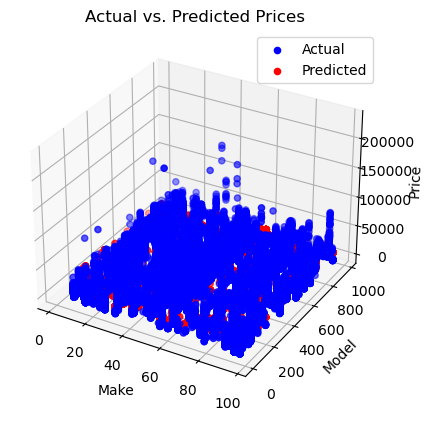

In [33]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted')

# Set labels
ax.set_xlabel('Make')
ax.set_ylabel('Model')
ax.set_zlabel('Price')

# Set title
ax.set_title('Actual vs. Predicted Prices')

# Add legend
plt.legend()

# Show plot
plt.show()

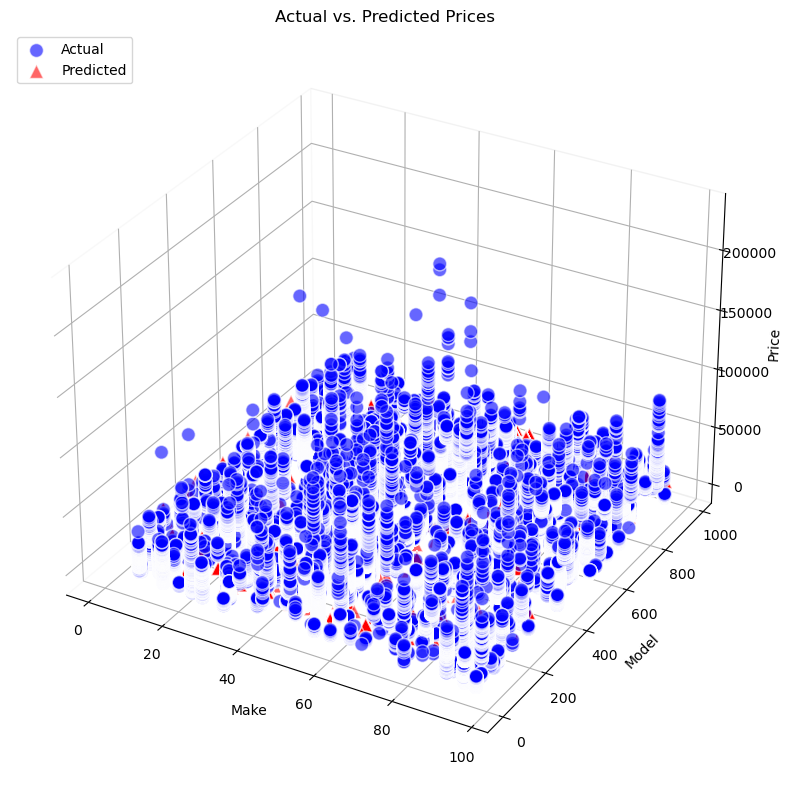

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
actual_scatter = ax.scatter(X_test[:, 0], X_test[:, 1], y_test, alpha=0.6, c='blue', edgecolors='w', s=100, label='Actual')
predicted_scatter = ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, alpha=0.6, c='red', marker='^', edgecolors='w', s=100, label='Predicted')

# Set labels
ax.set_xlabel('Make')
ax.set_ylabel('Model')
ax.set_zlabel('Price')

# Set title
ax.set_title('Actual vs. Predicted Prices')

# Customize the z-axis
ax.zaxis.get_major_formatter().set_useOffset(False)
ax.zaxis.get_major_formatter().set_scientific(False)

# Legend
plt.legend(loc='upper left')

# Gridlines and background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [38]:
print(y_test)

[29700. 11900.  8300. ... 14000. 14200. 17200.]


In [12]:
make_model_df = df.iloc[:, 1:3]

print(make_model_df)

        make  model
0         35    403
1         35    403
2         46    127
3         11    765
4         46    134
...      ...    ...
558832    35     97
558833    68    206
558834    46    339
558835    79    611
558836    72    550

[548426 rows x 2 columns]


Put make and model in a csv file to see which ones numbers match. Then enter them into the app to see if you get a good value. Figure out how to input make and models to get a predicted price.

In [108]:


    feature_vector = np.array([[35, 403]])

    predicted_price = model.predict(feature_vector)

    print("Predicted Price:", predicted_price)

Predicted Price: [13681.86103417]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [122]:
def predict_price(inputted_make, inputted_model):
    
    lowercase_make = inputted_make.lower()
    lowercase_model = inputted_model.lower()
    
    for key, value in make_mapping.items():  # change inputted make to label encoded value
        
        if str(key) == lowercase_make:
            inputted_make = value
    
    for key, value in model_mapping.items():  # change inputted model to label encoded value
        
        if str(key) == lowercase_model:
            inputted_model = value
    

    feature_vector = np.array([[inputted_make, inputted_model]])

    predicted_price = model.predict(feature_vector)
    predicted_price = "{:.2f}".format(float(predicted_price))

    print("Predicted Price: $",predicted_price)

In [121]:
predict_price('kia', 'sorento')

Predicted Price: $ 14108.90


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
